### Giới thiệu sơ lược về bộ dữ liệu chữ viết tay MNIST: 
Cơ sở dữ liệu MNIST gồm các chữ số viết tay với 784 đặc điểm, dữ liệu thô có sẵn tại: http://yann.lecun.com/exdb/mnist/. Nó có thể được chia thành tập huấn luyện gồm 60.000 mẫu đầu tiên và tập thử nghiệm gồm 10.000 mẫu. Đây là tập hợp con của tập lớn hơn có sẵn từ NIST. Các chữ số đã được chuẩn hóa kích thước và căn giữa trong một hình ảnh có kích thước cố định. Đây là cơ sở dữ liệu tốt cho những người muốn thử các kỹ thuật học tập và phương pháp nhận dạng mẫu trên dữ liệu trong thế giới thực trong khi dành ít nỗ lực nhất cho quá trình tiền xử lý và định dạng. Hình ảnh đen trắng (hai cấp độ) ban đầu từ NIST đã được chuẩn hóa kích thước để vừa với hộp 20x20 pixel trong khi vẫn duy trì tỷ lệ khung hình của chúng. Hình ảnh thu được chứa các mức xám do kỹ thuật khử răng cưa được sử dụng bởi thuật toán chuẩn hóa. các hình ảnh được căn giữa trong một hình ảnh 28x28 bằng cách tính toán khối tâm của các pixel và dịch hình ảnh để định vị điểm này ở giữa trường 28x28. Với một số phương pháp phân loại (đặc biệt là các phương pháp dựa trên mẫu, chẳng hạn như SVM và K-hàng xóm gần nhất), tỷ lệ lỗi được cải thiện khi các chữ số được căn giữa bởi hộp giới hạn thay vì tâm khối. Nếu bạn thực hiện kiểu xử lý trước này, bạn nên báo cáo nó trong các ấn phẩm của mình. Cơ sở dữ liệu MNIST được xây dựng từ NIST ban đầu được chỉ định là SD-3 làm tập huấn luyện và SD-1 làm tập kiểm tra. Tuy nhiên, SD-3 sạch hơn và dễ nhận biết hơn nhiều so với SD-1. Lý do cho điều này có thể là do SD-3 được thu thập trong số các nhân viên của Cục điều tra dân số, trong khi SD-1 được thu thập trong số học sinh trung học. Việc rút ra các kết luận hợp lý từ các thí nghiệm học tập đòi hỏi kết quả đó phải độc lập với việc lựa chọn tập huấn luyện và kiểm tra trong toàn bộ tập mẫu. Vì vậy cần phải xây dựng cơ sở dữ liệu mới bằng cách trộn các bộ dữ liệu của NIST. Bộ huấn luyện MNIST bao gồm 30.000 mẫu từ SD-3 và 30.000 mẫu từ SD-1. Bộ thử nghiệm của chúng tôi bao gồm 5.000 mẫu từ SD-3 và 5.000 mẫu từ SD-1. Tập huấn luyện mẫu 60.000 chứa các ví dụ từ khoảng 250 người viết. Chúng tôi đảm bảo rằng nhóm tác giả của tập huấn luyện và tập kiểm tra không liên kết với nhau. SD-1 chứa 58.527 hình ảnh chữ số được viết bởi 500 người viết khác nhau. Ngược lại với SD-3, nơi các khối dữ liệu từ mỗi bộ ghi xuất hiện theo trình tự, dữ liệu trong SD-1 được xáo trộn. Danh tính người viết cho SD-1 đã có sẵn và chúng tôi đã sử dụng thông tin này để sắp xếp lại các người viết. Sau đó, chúng tôi chia SD-1 thành hai: các ký tự được viết bởi 250 người viết đầu tiên sẽ được đưa vào tập huấn luyện mới của chúng tôi. 250 nhà văn còn lại được đưa vào tập thử nghiệm của chúng tôi. Như vậy chúng tôi đã có hai bộ với gần 30.000 ví dụ mỗi bộ. Bộ huấn luyện mới đã được hoàn thành với đủ các mẫu từ SD-3, bắt đầu từ mẫu số 0, để tạo thành một bộ đầy đủ gồm 60.000 mẫu huấn luyện. Tương tự, bộ thử nghiệm mới đã được hoàn thành với các mẫu SD-3 bắt đầu từ mẫu số 35.000 để tạo thành một bộ đầy đủ với 60.000 mẫu thử nghiệm. Chỉ có một tập hợp con gồm 10.000 hình ảnh thử nghiệm (5.000 từ SD-1 và 5.000 từ SD-3) có sẵn trên trang web này. Bộ đào tạo mẫu đầy đủ 60.000 có sẵn.

### Khai báo thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

### Đầu tiên, em lấy dữ liệu về chữ viết tay MNIST từ trang https://www.openml.org/search?type=data&sort=runs&id=554&status=active, và sử dụng thư viện sklearn để lấy dữ bộ dữ liệu ở fetch_openml với tên bộ dữ liệu là "mnist_784" và tiến hành phân chia thành tập huấn luyện, tập kiểm tra:

In [2]:
# Load dữ liệu từ MNIST
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = mnist.data.astype('float32'), mnist.target.astype('int')

# Chia thành tập train, test
num_train = 60000
num_test = 10000
X_train, y_train = X[:num_train], y[:num_train]
X_test, y_test = X[num_train:num_train + num_test], y[num_train:num_train + num_test]

. Hiển thị bộ dữ liệu với bảng:

In [3]:
pd.DataFrame(X)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


. Hiển thị bộ dữ liệu với dạng hình ảnh:

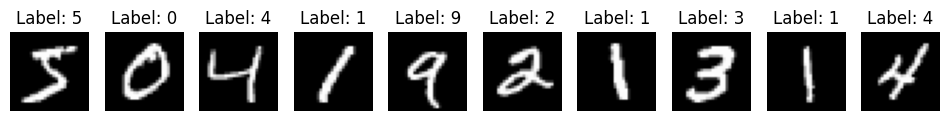

In [4]:
num_images = 10

fig, axes = plt.subplots(1, num_images, figsize=(12, 3))

for i in range(num_images):
    image = mnist.frame.iloc[i, :-1].values.astype(float).reshape(28, 28)
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Label: {mnist.frame.iloc[i, -1]}')
    axes[i].axis('off')

plt.show()

. Hiển thị biểu đồ biểu diễn mật độ của bộ dữ liệu trong tập train:

   Digit  Density
0      0     5923
1      1     6742
2      2     5958
3      3     6131
4      4     5842
5      5     5421
6      6     5918
7      7     6265
8      8     5851
9      9     5949


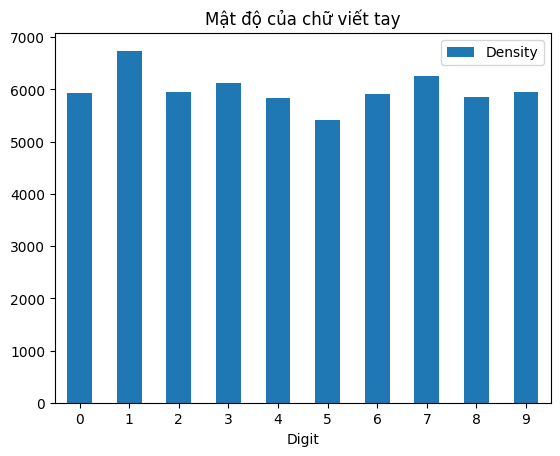

In [5]:
digit_density = np.unique(y_train, return_counts=True)
table_data = {'Digit': digit_density[0], 'Density': digit_density[1]}
table = pd.DataFrame(table_data)
table.plot.bar(x='Digit', y='Density', rot=0, title='Mật độ của chữ viết tay')
print(table)

Ta thấy rằng với mật độ trên thì các chữ viết tay có số lần xuất hiện khá cân bằng chỉ có số 1 là nhiều nhất với 6742 lần xuất hiện, số 5 thấp nhất với 5421 lần xuất hiện

### Tiếp theo, em định nghĩa các hàm tính toán trong kiến trúc mạng gồm hàm sigmoid, softmax, tanH, reLU, hàm tính f(x, w, b), mean squared của hàm mất mát, gradient của mean square hàm mất mát và gradient descent:

In [6]:
# Hàm kích hoạt sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Hàm kích hoạt tanH
def tanH(x):
    return np.tanh(x)

# Hàm kích hoạt ReLU
def reLU(x):
    return np.maximum(0, x)

# Hàm kích hoạt softmax
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Hàm tính output của mạng
def f(X, W, b):
    return softmax(np.dot(X, W) + b)

def f_sigmoid(X, W, b):
    return sigmoid(np.dot(X, W) + b)

# Hàm tính output của mạng sử dụng hàm kích hoạt tanh
def f_tanh(X, W, b):
    return tanH(np.dot(X, W) + b)

# Hàm tính output của mạng sử dụng hàm kích hoạt ReLU
def f_relu(X, W, b):
    return reLU(np.dot(X, W) + b)

# Hàm cross entropy loss
def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.sum(y_true * np.log(y_pred)) / len(y_true)

# Hàm tính đạo hàm của hàm cross entropy loss
def gradient_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -y_true / (y_pred + epsilon) / len(y_true)

# Hàm tính gradient descent
def gradient_descent(X_train, y_train, X_test, y_test, W, b, learning_rate, epochs, activation_func):
    train_losses = []
    test_losses = []

    for epoch in range(epochs):
        if activation_func == 'sigmoid':
            y_train_pred = f_sigmoid(X_train, W, b)
            y_val_pred = f_sigmoid(X_test, W, b)
        elif activation_func == 'tanh':
            y_train_pred = f_tanh(X_train, W, b)
            y_val_pred = f_tanh(X_test, W, b)
        elif activation_func == 'relu':
            y_train_pred = f_relu(X_train, W, b)
            y_val_pred = f_relu(X_test, W, b)
        elif activation_func == 'softmax':
            y_train_pred = f(X_train, W, b)
            y_val_pred = f(X_test, W, b)
        else:
            raise ValueError("Invalid activation function")

        # Tính gradient trên tập train
        grad_W_train = np.dot(X_train.T, (y_train_pred - y_train))
        grad_b_train = np.sum(y_train_pred - y_train, axis=0)

        # Cập nhật trọng số trên tập train
        W -= learning_rate * grad_W_train
        b -= learning_rate * grad_b_train

        # Tính loss trên tập train và validation
        train_loss = cross_entropy_loss(y_train, y_train_pred)
        test_loss = cross_entropy_loss(y_test, y_val_pred)

        train_losses.append(train_loss)
        test_losses.append(test_loss)

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Training Loss: {train_loss}, Test Loss: {test_loss}')

    return W, b, train_losses, test_losses


### Sau khi đã định nghĩa các hàm - khai báo dữ liệu ở trên, em tiến hành xử lý dữ liệu như: chọn một số ảnh ngẫu nhiên, chuẩn hóa dữ liệu, thiết lập các tham số cho kích thước của input, output, epochs

In [7]:
# Chọn một số ảnh ngẫu nhiên:
num_images = 10
random_indices = np.random.choice(X_train.shape[0], num_images, replace=False)

# Normalize dữ liệu
X_train /= 255.0
X_test /= 255.0

# One-hot encoding cho y (Chuyển dữ liệu test về dạng số)
num_classes = 10
y_train_onehot = np.zeros((y_train.shape[0], num_classes))
y_train_onehot[np.arange(y_train.shape[0]), y_train] = 1
y_test_onehot = np.zeros((y_test.shape[0], num_classes))
y_test_onehot[np.arange(y_test.shape[0]), y_test] = 1

# Thiết lập các tham số
input_size = X_train.shape[1]
output_size = num_classes
epochs = 100

### Khởi tạo learning rate, trọng số w, b, hàm kích hoạt và vẽ đồ thị hàm mất mát (Loss Function):

. Với hàm sigmoid:

In [9]:
learning_rate = 0.000009

Epoch 0, Training Loss: 1.841769569381297, Test Loss: 1.8443085916989228
Epoch 10, Training Loss: 4.59569675255306, Test Loss: 4.5927194969541
Epoch 20, Training Loss: 2.894523623725683, Test Loss: 2.8650306646254116
Epoch 30, Training Loss: 2.2401963616846765, Test Loss: 2.206791457532813
Epoch 40, Training Loss: 1.9075638037894398, Test Loss: 1.8730986104568064
Epoch 50, Training Loss: 1.7025491589680084, Test Loss: 1.6677811450619082
Epoch 60, Training Loss: 1.5610549466847146, Test Loss: 1.5259358371076204
Epoch 70, Training Loss: 1.4559782978220066, Test Loss: 1.420405722854571
Epoch 80, Training Loss: 1.3739782040158999, Test Loss: 1.3380024822302568
Epoch 90, Training Loss: 1.307730398560689, Test Loss: 1.2714760152455407


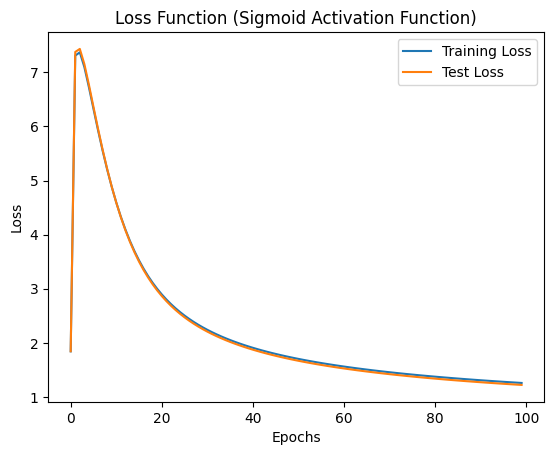

In [10]:
# Khởi tạo trọng số w, b, hàm kích hoạt:
W = np.random.randn(input_size, output_size)
b = np.zeros(output_size)
activation_func = 'sigmoid'

# Huấn luyện mô hình
W, b, losses, test_losses = gradient_descent(X_train, y_train_onehot, X_test, y_test_onehot, W, b, learning_rate, epochs, activation_func)
plt.plot(range(epochs), losses, test_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Test Loss'])
plt.title('Loss Function (Sigmoid Activation Function)')
plt.show()

. Với tanH:

In [180]:
learning_rate = 0.000002

Epoch 0, Training Loss: 17.636927513235808, Test Loss: 17.352926016009814
Epoch 10, Training Loss: 12.040543121114062, Test Loss: 11.843843391218055
Epoch 20, Training Loss: 10.75506323012687, Test Loss: 10.46564254698183
Epoch 30, Training Loss: 9.901817015969156, Test Loss: 9.640503539857368
Epoch 40, Training Loss: 9.361337278622912, Test Loss: 9.18556105214726
Epoch 50, Training Loss: 8.975289647388635, Test Loss: 8.80212112972144
Epoch 60, Training Loss: 8.70218631050617, Test Loss: 8.572713727300302
Epoch 70, Training Loss: 8.515022550209519, Test Loss: 8.358733075695511
Epoch 80, Training Loss: 8.309143094801318, Test Loss: 8.117726799927581
Epoch 90, Training Loss: 8.154881194307814, Test Loss: 7.897945090528482


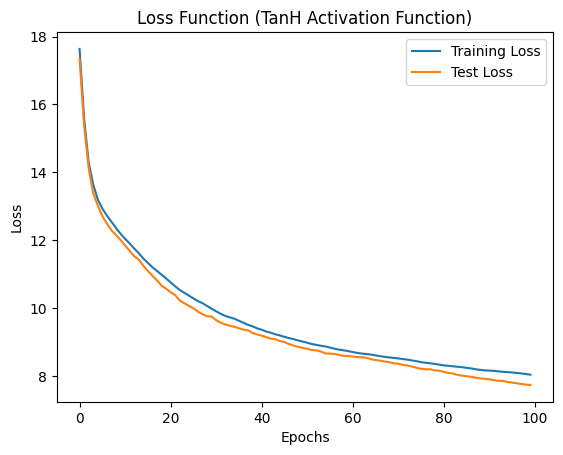

In [181]:
W = np.random.randn(input_size, output_size)
b = np.zeros(output_size)
activation_func = 'tanh'

# Huấn luyện mô hình
W, b, losses, test_losses = gradient_descent(X_train, y_train_onehot, X_test, y_test_onehot, W, b, learning_rate, epochs, activation_func)

plt.plot(range(epochs), losses, test_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Test Loss'])
plt.title('Loss Function (TanH Activation Function)')
plt.show()

. Với ReLU:

In [46]:
learning_rate = -0.00000005

Epoch 0, Training Loss: 22.38726323531048, Test Loss: 22.71153195359625
Epoch 10, Training Loss: 18.74957807852934, Test Loss: 19.045698313602884
Epoch 20, Training Loss: 13.542784567887951, Test Loss: 13.669209652489098
Epoch 30, Training Loss: 8.455509232871433, Test Loss: 8.468014609778475
Epoch 40, Training Loss: 4.981815174140286, Test Loss: 5.029608862402693
Epoch 50, Training Loss: 3.318200397385317, Test Loss: 3.4056215648570207
Epoch 60, Training Loss: 1.53888435751317, Test Loss: 1.5740902901979792
Epoch 70, Training Loss: 0.4417201937739031, Test Loss: 0.4685721834781049
Epoch 80, Training Loss: 0.12355232573337234, Test Loss: 0.12153624934805923
Epoch 90, Training Loss: 0.004662177879450532, Test Loss: 6.367849158484943e-05


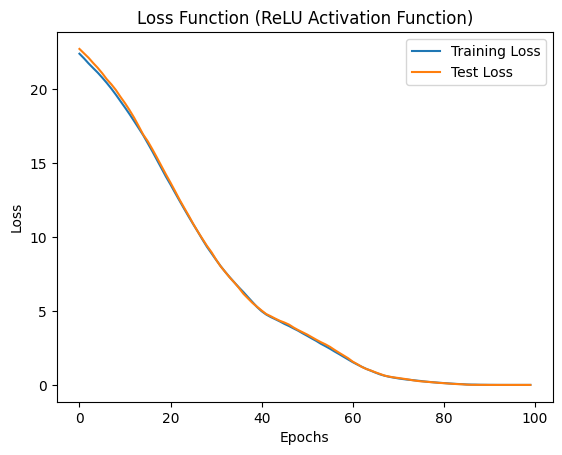

In [47]:
W = np.random.randn(input_size, output_size)
b = np.zeros(output_size)
activation_func = 'relu'

# Huấn luyện mô hình
W, b, losses, test_losses = gradient_descent(X_train, y_train_onehot, X_test, y_test_onehot, W, b, learning_rate, epochs, activation_func)

plt.plot(range(epochs), losses, test_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Test Loss'])
plt.title('Loss Function (ReLU Activation Function)')
plt.show()